In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

1.	Read the given comma separated values as dataframe (investments.csv)

In [2]:
df=pd.read_csv('investments.csv')
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


2.	List out all column names.

In [36]:
print(df.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant', 'category_list_count'], dtype='object')


In [4]:
print(list(df))

['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               49437 non-null  object 
 1   homepage_url       45989 non-null  object 
 2   category_list      45477 non-null  object 
 3   market             45470 non-null  object 
 4   funding_total_usd  49438 non-null  object 
 5   status             48124 non-null  object 
 6   country_code       44165 non-null  object 
 7   state_code         30161 non-null  object 
 8   region             44165 non-null  object 
 9   city               43322 non-null  object 
 10  funding_rounds     49438 non-null  int64  
 11  founded_year       38482 non-null  float64
 12  debt_financing     49438 non-null  int64  
 13  grant              49438 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 5.3+ MB


3.	Create a dataframe with numerical columns.

In [7]:
df2=df.select_dtypes(include='number')
df2.head()

,funding_rounds,founded_year,debt_financing,grant
0,1,2012.0,0,0
1,2,NaN,0,0
2,1,2012.0,0,0
3,1,2011.0,0,0
4,2,2014.0,0,0


4.	Create a dataframe with categorical columns.

In [8]:
df3=df.select_dtypes(include='object')
df3.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth


5.	Get a summary on the data and draw inferences if any.

In [9]:
df.describe()

,funding_rounds,founded_year,debt_financing,grant
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,1.888157e+06,1.628453e+05
std,1.294213,7.579203,1.382046e+08,5.612088e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,3.007950e+10,7.505000e+08


6.	Display duplicate rows.

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated(subset=['name','category_list','market']).sum()

3

In [12]:
df[df.duplicated(subset=['name','category_list','market'])]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
4150,AYOXXA Biosystems,http://www.ayoxxa.com/,|Biotechnology|,Biotechnology,"1,40,81,347",operating,DEU,NaN,Cologne,Köln,1,2010.0,0,0
24028,Lightex Ltd.,NaN,NaN,NaN,"5,00,000",operating,NaN,NaN,NaN,NaN,1,NaN,0,0
36084,Roadmap,NaN,NaN,NaN,-,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0


In [13]:
## finding duplicate copies of duplicate records
f=(df.name=='AYOXXA Biosystems') & (df.category_list=='|Biotechnology|') & (df.market=='Biotechnology')
df[f]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
4149,AYOXXA Biosystems,http://ayoxxa.com,|Biotechnology|,Biotechnology,"1,21,45,503",operating,DEU,NaN,Cologne,Cologne,1,2010.0,0,0
4150,AYOXXA Biosystems,http://www.ayoxxa.com/,|Biotechnology|,Biotechnology,"1,40,81,347",operating,DEU,NaN,Cologne,Köln,1,2010.0,0,0


In [14]:
i=(df.name=='Lightex Ltd.') & (df.category_list.isna()) & (df.market.isna())
df[i]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
24027,Lightex Ltd.,NaN,NaN,NaN,-,operating,NaN,NaN,NaN,NaN,1,NaN,0,0
24028,Lightex Ltd.,NaN,NaN,NaN,"5,00,000",operating,NaN,NaN,NaN,NaN,1,NaN,0,0


In [15]:
j=(df.name=='Roadmap') & (df.category_list.isna()) & (df.market.isna())
df[j]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
36083,Roadmap,http://www.roadmapsystems.co.uk/,NaN,NaN,-,operating,GBR,NaN,London,Cambridge,1,NaN,0,0
36084,Roadmap,NaN,NaN,NaN,-,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0


In [40]:
i=(df.name=='Roadmap') & (df.category_list.isna())
df[i]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count
36083,Roadmap,http://www.roadmapsystems.co.uk/,NaN,NaN,0.0,operating,GBR,NaN,London,Cambridge,1,NaN,0,0,-1
36084,Roadmap,NaN,NaN,NaN,0.0,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0,-1


In [43]:
#deleting duplicates
df2=df.drop_duplicates(subset=['name','category_list','market'], keep=False, inplace=False)
df2.shape

(49432, 15)

In [17]:
df.shape

(49438, 14)

7.	For each column find out the percentage of missing values.

In [44]:
count=df.isnull().sum()
percentage=df.isnull().sum()/df.shape[0]*100
pd.concat([count,percentage],axis=1,keys=['count','percentage']).sort_values('count', ascending=False)

,count,percentage
state_code,19277,38.992273
founded_year,10956,22.161091
city,6116,12.371051
country_code,5273,10.665885
region,5273,10.665885
market,3968,8.026215
category_list,3961,8.012056
homepage_url,3449,6.976415
status,1314,2.657875
name,1,0.002023


8.	Find count of ‘name’ in each ‘country_code’.

In [19]:
df.groupby('country_code')['name'].count()

country_code
ALB        1
ARE       66
ARG      149
ARM        2
AUS      314
       ...  
USA    28793
UZB        1
VNM       21
ZAF       52
ZWE        1
Name: name, Length: 115, dtype: int64

9.	What is the percentage of the companies which have status ‘acquired’ ‘operating’?

In [20]:
df[df.status.isin(['acquired','operating'])].shape[0]/df.shape[0]*100

92.07694486022898

10.	What is the percentage of the companies which have status ‘acquired’ acquired?

In [21]:
df[df.status.isin(['acquired'])].shape[0]/df.shape[0]*100

7.467939641571261

11.	Filter records having missing values in column ‘year_founded’.

In [45]:
df[df.founded_year.isnull()].head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,4912393.0,closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,0,0,1
9,01Games Technology,http://www.01games.hk/,|Games|,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,0,0,1
11,1-4 All,NaN,|Entertainment|Games|Software|,Software,0.0,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,0,0,3
19,1000jobboersen.de,http://www.1000jobboersen.de,|Curated Web|,Curated Web,0.0,operating,DEU,NaN,Berlin,Berlin,1,NaN,0,0,1


12.	Create a column ‘category_list_count’ having count of category lists.

In [23]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


In [24]:
df['category_list_count']=df.category_list.apply(lambda x:len(str(x).split('|'))-2)
df.loc[:,['category_list_count','category_list']]

,category_list_count,category_list
0,4,|Entertainment|Politics|Social Media|News|
1,1,|Games|
2,2,|Publishing|Education|
3,10,|Electronics|Guides|Coffee|Restaurants|Music|i...
4,3,|Tourism|Entertainment|Games|
...,...,...
49433,6,|Analytics|Gamification|Developer APIs|iOS|And...
49434,1,|Enterprise Software|
49435,4,|Web Development|Advertising|Wireless|Mobile|
49436,1,|Games|


13.	Find average funding_total_usd for each country_code

In [25]:
df.funding_total_usd = df.funding_total_usd.apply(lambda x: x.replace(',','').replace('-','0')).astype(float)

In [26]:
df.groupby('country_code')['funding_total_usd'].mean()

country_code
ALB    0.000000e+00
ARE    9.832352e+06
ARG    1.787353e+06
ARM    1.340649e+07
AUS    8.276922e+06
           ...     
USA    1.612353e+07
UZB    9.000000e+04
VNM    1.023431e+07
ZAF    1.243687e+07
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

14.	Find total funding_total_usd for each country_code.

In [27]:
df.groupby('country_code')['funding_total_usd'].sum()

country_code
ALB    0.000000e+00
ARE    6.489352e+08
ARG    2.663157e+08
ARM    2.681298e+07
AUS    2.598953e+09
           ...     
USA    4.642448e+11
UZB    9.000000e+04
VNM    2.149205e+08
ZAF    6.467170e+08
ZWE    1.000000e+07
Name: funding_total_usd, Length: 115, dtype: float64

15.	Find average funding_total_usd in each country_code and region.

In [28]:
df.groupby(['country_code','region'])['funding_total_usd'].mean()

country_code  region      
ALB           Tirana          0.000000e+00
ARE           Abu Dhabi       1.562500e+07
              Dubai           9.651332e+06
ARG           ARG - Other     3.049519e+05
              Buenos Aires    1.760614e+06
                                  ...     
ZAF           Cape Town       1.559547e+07
              Durban          0.000000e+00
              Johannesburg    6.091429e+06
              ZAF - Other     0.000000e+00
ZWE           Harare          1.000000e+07
Name: funding_total_usd, Length: 1096, dtype: float64

In [29]:
df.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant', 'category_list_count'], dtype='object')

16.	How many companies have got just 1 round of funding?

In [30]:
print(df[df.funding_rounds==1]['name'].shape[0])#includes duplicates+null
print(df[df.funding_rounds==1]['name'].count()) #includes duplicates
print(len(df[df.funding_rounds==1]['name'].unique()))#excludes duplicates but includes null
print(df[df.funding_rounds==1]['name'].nunique())#excludes duplicates
print(len(set(df[df.funding_rounds==1]['name'])))#excludes duplicates but includes null

32039
32038
32006
32005
32006


17.	Perform mapping on status column; acquired -> A, operating -> O and closed -> C.

In [31]:
df.status.apply(lambda x: 'A' if x=='acquired' else 'O' if x=='operating' else 'C' if x=='closed' else 'M')

0        A
1        O
2        O
3        O
4        O
        ..
49433    O
49434    O
49435    O
49436    O
49437    O
Name: status, Length: 49438, dtype: object

18.	How many companies have ‘debt_financing’ above zero?

In [32]:
print(df[df.debt_financing>0]['name'].shape[0])#includes duplicates+null
print(df[df.debt_financing>0]['name'].count()) #includes duplicates
print(len(df[df.debt_financing>0]['name'].unique()))#excludes duplicates but includes null
print(df[df.debt_financing>0]['name'].nunique())#excludes duplicates
print(len(set(df[df.debt_financing>0]['name'])))#excludes duplicates but includes null

4225
4225
4225
4225
4225


19.	Create a column ‘homepage’ to store company name from ‘homepage_url’: For example: If url is http://www.waywire.com, name is waywire.

In [33]:
import re
df.homepage_url.apply(lambda x: re.sub('http://www.|.com|http://|.org|/','',str(x)))

0               waywire
1            enjoyandtv
2         rockyourpaper
3        InTouchNetwork
4                   nan
              ...      
49433             zzish
49434            zznode
49435           zzzzapp
49436        alistgames
49437          xplusone
Name: homepage_url, Length: 49438, dtype: object

20.	Find the count of companies in each of the markets.

In [34]:
df.groupby('market')['name'].count()

market
3D               25
3D Printing       9
3D Technology     8
Accounting       18
Ad Targeting     13
                 ..
iOS              48
iPad             29
iPhone           69
iPod Touch        3
mHealth           8
Name: name, Length: 753, dtype: int64

21.	Find the count of companies in each of the markets and store the new column ‘cnt_name’ in the original dataframe.

In [47]:
df['cnt_name']=df.groupby('market')['name'].transform('count')
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0


22.	Rename ' funding_total_usd ' to 'funding_total_usd'

23.	Fill missing values in column ‘city’ with ‘other_city’

In [51]:
df.city.fillna('other_city', inplace=True)


In [52]:
df.city.tolist()

['New York',
 'Los Angeles',
 'Tallinn',
 'London',
 'Fort Worth',
 'Oakland Park',
 'Buenos Aires',
 'other_city',
 'Champaign',
 'Hong Kong',
 'Las Condes',
 'Connellys Springs',
 'Los Angeles',
 'Iselin',
 'Orlando',
 'London',
 'Woodbine',
 'Lake Oswego',
 'other_city',
 'Berlin',
 'San Francisco',
 'Bellevue',
 'Paris',
 'Beijing',
 'other_city',
 'Beijing',
 'Madison',
 'San Francisco',
 'New York',
 'Mississauga',
 'Cleveland',
 'other_city',
 'Sydney',
 'New York',
 'Oakland',
 'Lexington',
 'other_city',
 'Shanghai',
 'Huntsville',
 'other_city',
 'other_city',
 'Chicago',
 'Amarillo',
 'Melbourne',
 'Providence',
 'other_city',
 'Timisoara',
 'Cambridge',
 'Paris',
 'Gorinchem',
 'West Hollywood',
 'Bedford',
 'other_city',
 'Stockholm',
 'San Francisco',
 'Santa Monica',
 'other_city',
 'San Francisco',
 'other_city',
 'Seattle',
 'Lake Mary',
 'other_city',
 'Bedford',
 'Suzhou',
 'Chicago',
 'Beijing',
 'Guangzhou',
 'Moscow',
 'Copenhagen',
 'Kirkland',
 'Bangalore',
 'Si

24.	For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’

In [53]:
df.groupby('city')['funding_total_usd'].transform(lambda x:x-np.mean(x))

0       -2.444616e+07
1       -7.234447e+06
2       -1.723232e+06
3       -6.784773e+06
4       -3.522942e+07
             ...     
49433   -7.964773e+06
49434   -2.591016e+07
49435    5.826533e+04
49436    3.434537e+06
49437    1.880384e+07
Name: funding_total_usd, Length: 49438, dtype: float64

25.	Normalize ‘‘funding_total_usd’ at country level.

In [56]:
df.country_code=df.country_code.fillna('other_country')
df.groupby('country_code')['funding_total_usd'].transform(lambda x:(x-x.min())/(x.max()-x.min()))

0        0.000058
1        0.000133
2        0.002106
3        0.002381
4        0.000002
           ...   
49433    0.000508
49434    0.000496
49435    0.064932
49436    0.008809
49437    0.001496
Name: funding_total_usd, Length: 49438, dtype: float64

26.	What is the average ‘funding_total_usd’ for each city?

In [58]:
df.groupby('city')['funding_total_usd'].mean()s

city
6 October City    1.450000e+05
A Coruña          1.236930e+06
Aachen            6.448845e+06
Aalborg           1.166667e+05
Aarhus            2.546595e+06
                      ...     
Évora             0.000000e+00
Évry              2.212513e+05
Ísafjörður        4.000000e+06
Örnsköldsvik      0.000000e+00
Østerby Havn      8.550000e+05
Name: funding_total_usd, Length: 4189, dtype: float64

27.	Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.

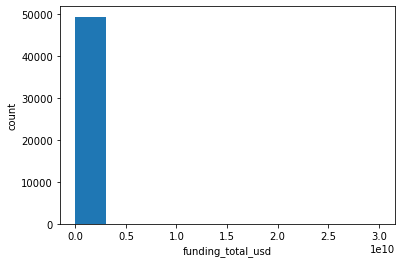

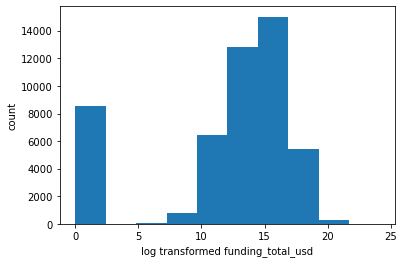

In [74]:
plt.hist(df.funding_total_usd)
plt.xlabel('funding_total_usd')
plt.ylabel('count')
plt.show()

plt.hist(np.log1p(df.funding_total_usd))
plt.xlabel('log transformed funding_total_usd')
plt.ylabel('count')
plt.show()

28.	What is maximum ‘funding_total_usd’ for each market status?

In [59]:
df.groupby('status')['funding_total_usd'].max()

status
acquired     5.700000e+09
closed       1.567504e+09
operating    3.007950e+10
Name: funding_total_usd, dtype: float64

29.	How many years has it been since each company was founded?

In [60]:
from datetime import datetime
datetime.today().year-df.founded_year

0         9.0
1         NaN
2         9.0
3        10.0
4         7.0
         ... 
49433     8.0
49434     NaN
49435     9.0
49436     NaN
49437    22.0
Name: founded_year, Length: 49438, dtype: float64

30.	Visualize ‘grant’ distribution.

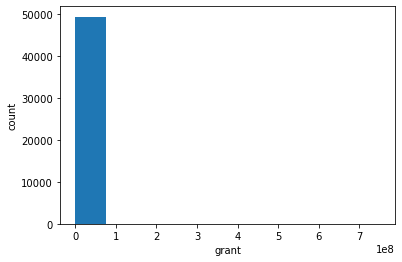

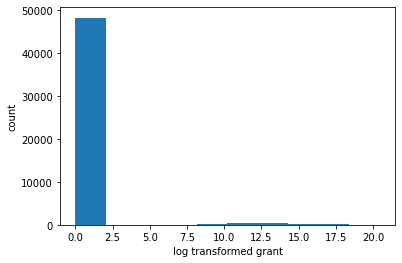

In [75]:
plt.hist(df.grant)
plt.xlabel('grant')
plt.ylabel('count')
plt.show()

plt.hist(np.log1p(df.grant))
plt.xlabel('log transformed grant')
plt.ylabel('count')
plt.show()

31.	Visualize ‘debt_financing’ distribution.

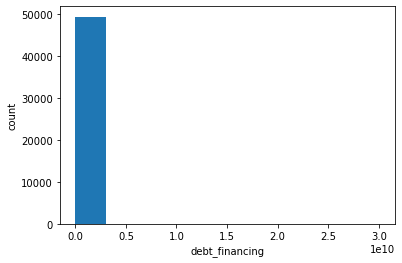

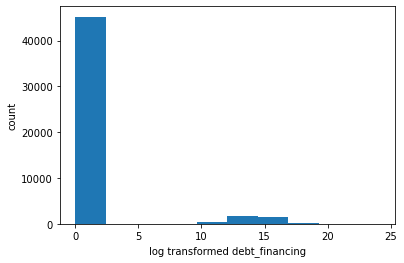

In [76]:
plt.hist(df.debt_financing)
plt.xlabel('debt_financing')
plt.ylabel('count')
plt.show()

plt.hist(np.log1p(df.debt_financing))
plt.xlabel('log transformed debt_financing')
plt.ylabel('count')
plt.show()

32.	Display proportion of companies status.

In [61]:
df.status.value_counts()/df.shape[0]*100

operating    84.609005
acquired      7.467940
closed        5.265181
Name: status, dtype: float64

33.	How many US states are available?

In [63]:
df[df.country_code=='USA']['state_code'].nunique()

51

34.	create column ‘cmt_address’ by joining country code, state code, region and city.

In [67]:
df['cmt_address']=np.where(df.country_code.isna(),df.country_code.fillna('Missing'),df.country_code)+' '+np.where(df.state_code.isna(),df.state_code.fillna('Missing'),df.state_code)+' '+np.where(df.region.isna(),df.region.fillna('Missing'),df.region)+' '+np.where(df.city.isna(),df.city.fillna('Missing'),df.city)
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,cnt_name,cmt_address
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,378.0,USA NY New York City New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,1182.0,USA CA Los Angeles Los Angeles
2,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2,69.0,EST Missing Tallinn Tallinn
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,10,43.0,GBR Missing London London
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3,21.0,USA TX Dallas Fort Worth


35.	select columns with underscore in their names.

In [68]:
df.filter(regex='_')

,homepage_url,category_list,funding_total_usd,country_code,state_code,funding_rounds,founded_year,debt_financing,category_list_count,cnt_name,cmt_address
0,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,1750000.0,USA,NY,1,2012.0,0,4,378.0,USA NY New York City New York
1,http://enjoyandtv.com,|Games|,4000000.0,USA,CA,2,NaN,0,1,1182.0,USA CA Los Angeles Los Angeles
2,http://www.rockyourpaper.org,|Publishing|Education|,40000.0,EST,NaN,1,2012.0,0,2,69.0,EST Missing Tallinn Tallinn
3,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,1500000.0,GBR,NaN,1,2011.0,0,10,43.0,GBR Missing London London
4,NaN,|Tourism|Entertainment|Games|,60000.0,USA,TX,2,2014.0,0,3,21.0,USA TX Dallas Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...
49433,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,320000.0,GBR,NaN,1,2013.0,0,6,863.0,GBR Missing London London
49434,http://www.zznode.com,|Enterprise Software|,1587301.0,CHN,NaN,1,NaN,0,1,1280.0,CHN Missing Beijing Beijing
49435,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,97398.0,HRV,NaN,5,2012.0,0,4,103.0,HRV Missing Split Split
49436,http://www.alistgames.com,|Games|,9300000.0,other_country,NaN,1,NaN,0,1,1182.0,other_country Missing Missing other_city
